In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
directory = r''

In [4]:
Name=[]
for file in os.listdir(directory):
    if file!='.directory':
        Name+=[file]
print(Name)
print(len(Name))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']
19


In [43]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))
print(normal_mapping)
print(reverse_mapping)
def mapper(value):
    return reverse_mapping[value]


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'add': 10, 'dec': 11, 'div': 12, 'eq': 13, 'mul': 14, 'sub': 15, 'x': 16, 'y': 17, 'z': 18}
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'add', 11: 'dec', 12: 'div', 13: 'eq', 14: 'mul', 15: 'sub', 16: 'x', 17: 'y', 18: 'z'}


In [6]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg' or im[-4:]=='.png':
            # print(im)
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1


In [7]:
print(len(testset[0][0]))

40


In [8]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)
# print(labels0)

In [9]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(7411, 40, 40, 3)
(7411, 19)


In [10]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)
print(test.shape)
print(tlabels.shape)

(2660, 40, 40, 3)
(2660, 17)


In [11]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=1)
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(5928, 40, 40, 3)
(1483, 40, 40, 3)
(5928, 19)
(1483, 19)


In [12]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [39]:
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False
#pretrained_model.compile(optimizer='adam',losbs='categorical_crossentropy',metrics=['accuracy'])
#pretrained_model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=15)

In [40]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(19, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(x)

Tensor("dense_11/Relu:0", shape=(None, 128), dtype=float32)


In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
fitted_model=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=15)

Epoch 1/15
186/186 [==============================] - 45s 240ms/step - loss: 1.6255 - accuracy: 0.5002 - val_loss: 0.9743 - val_accuracy: 0.7100
Epoch 2/15
186/186 [==============================] - 42s 225ms/step - loss: 1.0602 - accuracy: 0.6544 - val_loss: 0.7586 - val_accuracy: 0.7613
Epoch 3/15
186/186 [==============================] - 42s 224ms/step - loss: 0.9522 - accuracy: 0.6918 - val_loss: 0.6740 - val_accuracy: 0.7862
Epoch 4/15
186/186 [==============================] - 42s 224ms/step - loss: 0.8601 - accuracy: 0.7147 - val_loss: 0.5860 - val_accuracy: 0.8213
Epoch 5/15
186/186 [==============================] - 42s 223ms/step - loss: 0.8037 - accuracy: 0.7289 - val_loss: 0.5473 - val_accuracy: 0.8307
Epoch 6/15
186/186 [==============================] - 41s 223ms/step - loss: 0.7920 - accuracy: 0.7389 - val_loss: 0.5251 - val_accuracy: 0.8301
Epoch 7/15
186/186 [==============================] - 42s 225ms/step - loss: 0.7486 - accuracy: 0.7535 - val_loss: 0.5046 - val_ac

In [44]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        81
           1       0.94      0.91      0.93        69
           2       0.77      0.55      0.64        73
           3       0.82      0.75      0.79        81
           4       0.67      0.84      0.75        69
           5       0.64      0.83      0.72        81
           6       0.69      0.81      0.74        84
           7       0.88      0.83      0.85        86
           8       0.85      0.93      0.89        72
           9       0.76      0.61      0.68        89
          10       0.99      0.93      0.96        83
          11       1.00      0.94      0.97        84
          12       1.00      0.89      0.94        82
          13       0.89      0.96      0.92        76
          14       0.96      0.90      0.93        84
          15       0.95      0.97      0.96        91
          16       0.88      0.96      0.92        82
          17       0.87    

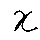

In [47]:
load_img(r'C:\Users\Muhammad Haris\dataset\x\0N69wLku.png',target_size=(40,40))

In [48]:
image=load_img(r'C:\Users\Muhammad Haris\dataset\x\0N69wLku.png',target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [49]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is x.
